https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3

Import Library

In [ ]:
pip install kmodes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes 

import pickle  
from pathlib import Path

Import Data

In [ ]:
#Load the data
#import drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Customer Segmentation/CustSegmSTI_Aug20Jul21.csv')

In [ ]:
data.head()

,No_cust,Name,Age,Job,NilaiBelanjaSetahun,Dept_code
0,100002,ACIAK UD.,38,Others,1571818,PDG
1,100004,AFEN,71,Tukang/ Workshop Furniture,7581363,PDG
2,100011,ALFI TABING,38,Kontraktor,1587273,PDG
3,100012,ALFI PERABOT (AJO),38,Tukang/ Workshop Furniture,3173181,PDG
4,100028,PEKANBARU REKLAME,38,Kontraktor,1980765,PKU


In [ ]:
#menampilkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No_cust              480 non-null    int64 
 1   Name                 480 non-null    object
 2   Age                  480 non-null    int64 
 3   Job                  480 non-null    object
 4   NilaiBelanjaSetahun  480 non-null    int64 
 5   Dept_code            480 non-null    object
dtypes: int64(3), object(3)
memory usage: 22.6+ KB


In [ ]:
data

,No_cust,Name,Age,Job,NilaiBelanjaSetahun,Dept_code
0,100002,ACIAK UD.,38,Others,1571818,PDG
1,100004,AFEN,71,Tukang/ Workshop Furniture,7581363,PDG
2,100011,ALFI TABING,38,Kontraktor,1587273,PDG
3,100012,ALFI PERABOT (AJO),38,Tukang/ Workshop Furniture,3173181,PDG
4,100028,PEKANBARU REKLAME,38,Kontraktor,1980765,PKU
...,...,...,...,...,...,...
475,103838,RIZKY RAMADHAN,38,Kontraktor,5434546,PDG
476,103839,INDOMATIC MANDIRI SENTOSA PT.,38,Others,11181817,PDG
477,103840,ZAINUDDIN,38,Tukang/ Workshop Furniture,2950454,PDG
478,103841,TANJUNG PURA MOTOR,38,Others,878182,PDG


In [ ]:
#Jika ada data yg null, gunakan replace
#data['Age'] = data['Age'].replace(np.nan, 38)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

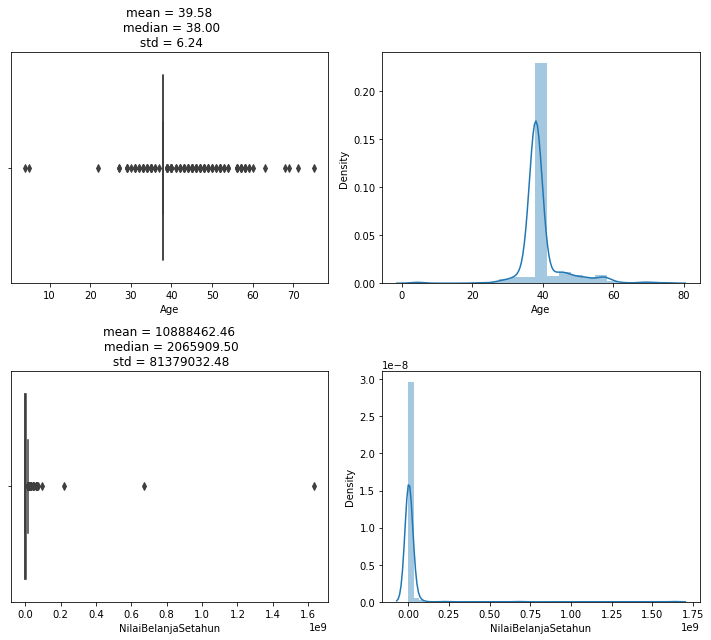

In [ ]:
#Eksplorasi Data Numerik
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(data[kol], ax = axs[i][0])
	    sns.distplot(data[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(data[kol].mean(), data[kol].median(), data[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Age','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

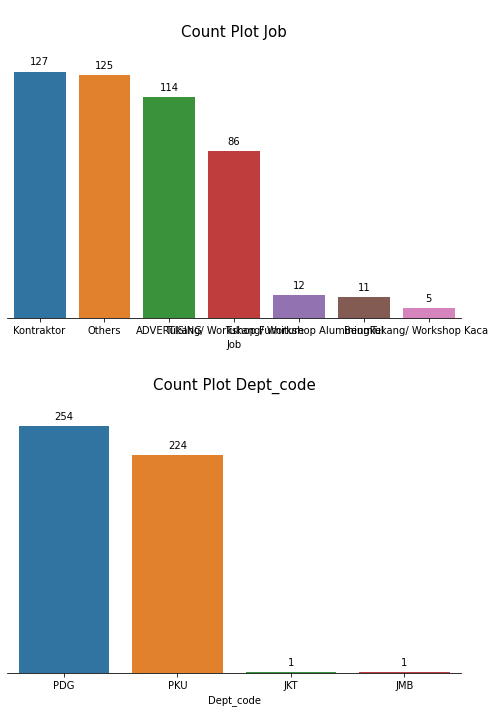

In [ ]:
#Eksplorasi Data Kategorikal
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Job','Dept_code']  

# Membuat canvas
fig, axs = plt.subplots(2,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(data[kol], order = data[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

Standarisasi Kolom Numerik

In [ ]:
from sklearn.preprocessing import StandardScaler  
kolom_numerik = ['Age','NilaiBelanjaSetahun']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(data[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(data[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=data.index, columns=data[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  


Statistik Sebelum Standardisasi

         Age  NilaiBelanjaSetahun
count  480.0         4.800000e+02
mean    39.6         1.088846e+07
std      6.2         8.137903e+07
min      4.0         2.545500e+04
25%     38.0         7.634770e+05
50%     38.0         2.065910e+06
75%     38.0         6.153704e+06
max     75.0         1.631374e+09
Contoh hasil standardisasi

        Age  NilaiBelanjaSetahun
0 -0.253187            -0.114604
1  5.037689            -0.040681
2 -0.253187            -0.114414
3 -0.253187            -0.094906
4 -0.253187            -0.109574
Statistik hasil standardisasi

         Age  NilaiBelanjaSetahun
count  480.0                480.0
mean     0.0                  0.0
std      1.0                  1.0
min     -6.0                 -0.0
25%     -0.0                 -0.0
50%     -0.0                 -0.0
75%     -0.0                 -0.0
max      6.0                 20.0


In [ ]:
#Mengubah tipe data
data['Job'] = data['Job'].apply(lambda x:str(x))
data['Dept_code'] = data['Dept_code'].apply(lambda x:str(x))

In [ ]:
data.dtypes

No_cust                 int64
Name                   object
Age                     int64
Job                    object
NilaiBelanjaSetahun     int64
Dept_code              object
dtype: object

In [ ]:
#Konversi Kategorikal Data dgn Label Encoder

from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Job','Dept_code']  
  
# Membuat salinan data frame  
df_encode = data[kolom_kategorikal].copy()  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head(9))

   Job  Dept_code
0    3          2
1    5          2
2    2          2
3    5          2
4    2          3
5    5          2
6    2          3
7    3          2
8    2          2


In [ ]:
#Menggabungkan Data untuk Permodelan
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head(9))

   Job  Dept_code       Age  NilaiBelanjaSetahun
0    3          2 -0.253187            -0.114604
1    5          2  5.037689            -0.040681
2    2          2 -0.253187            -0.114414
3    5          2 -0.253187            -0.094906
4    2          3 -0.253187            -0.109574
5    5          2  4.556700            -0.053435
6    2          3 -0.253187            -0.129705
7    3          2 -0.253187            -0.127095
8    2          2 -0.253187            -0.118876


Permodelan K-Prototypes

In [ ]:
df_model.head()

,Job,Dept_code,Age,NilaiBelanjaSetahun
0,3,2,-0.253187,-0.114604
1,5,2,5.037689,-0.040681
2,2,2,-0.253187,-0.114414
3,5,2,-0.253187,-0.094906
4,2,3,-0.253187,-0.109574


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job                  480 non-null    int64  
 1   Dept_code            480 non-null    int64  
 2   Age                  480 non-null    float64
 3   NilaiBelanjaSetahun  480 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.1 KB


In [ ]:
df_model.dtypes

Job                      int64
Dept_code                int64
Age                    float64
NilaiBelanjaSetahun    float64
dtype: object

In [ ]:
data['Age'] = data['Age'].apply(lambda x:str(x))
data['NilaiBelanjaSetahun'] = data['NilaiBelanjaSetahun'].apply(lambda x:str(x))

Mencari Jumlah Cluster yang Optimal

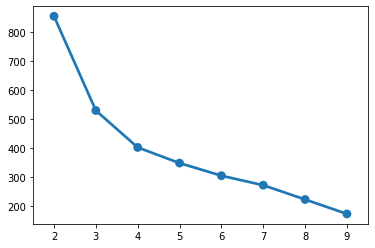

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan Iterasi untuk Mendapatkan nilai Cost
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k,random_state=75)
  kproto.fit_predict(df_model, categorical=[0,1])
  cost[k]= kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

In [ ]:
#Membuat Model
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=4, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [ ]:
#Menggunakan model

clusters = kproto.predict(df_model, categorical=[0,1])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = data.copy()
df_final['cluster'] = clusters
print(df_final.head())


segmen pelanggan: [2 0 2 2 1 0 1 2 2 2 1 1 2 0 2 2 0 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2
 2 2 2 2 3 1 1 2 2 1 2 1 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 2 0 2 1 0 0 1 1 1 1 2 1 2 0 1 1 1 2 1
 1 2 2 2 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1
 2 2 0 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 1 2 1 1 2 1 1 1 1 1 1 0 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 0 0 1 1 2 1 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2
 0 2 2 0 2 2 0 2 2 2 0 1 1 1 1 1 1 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 2 0 2 2 2 2 0 0 2 0 0 2 2 1 1 1 1 1 0 1 1 0 1 2 0 2 0 2 2 2 2 2 0 0
 1 2 2 1 1 1 1 1 1 0 2 2 0 0 2 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

   No_c

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ValueError: ignored

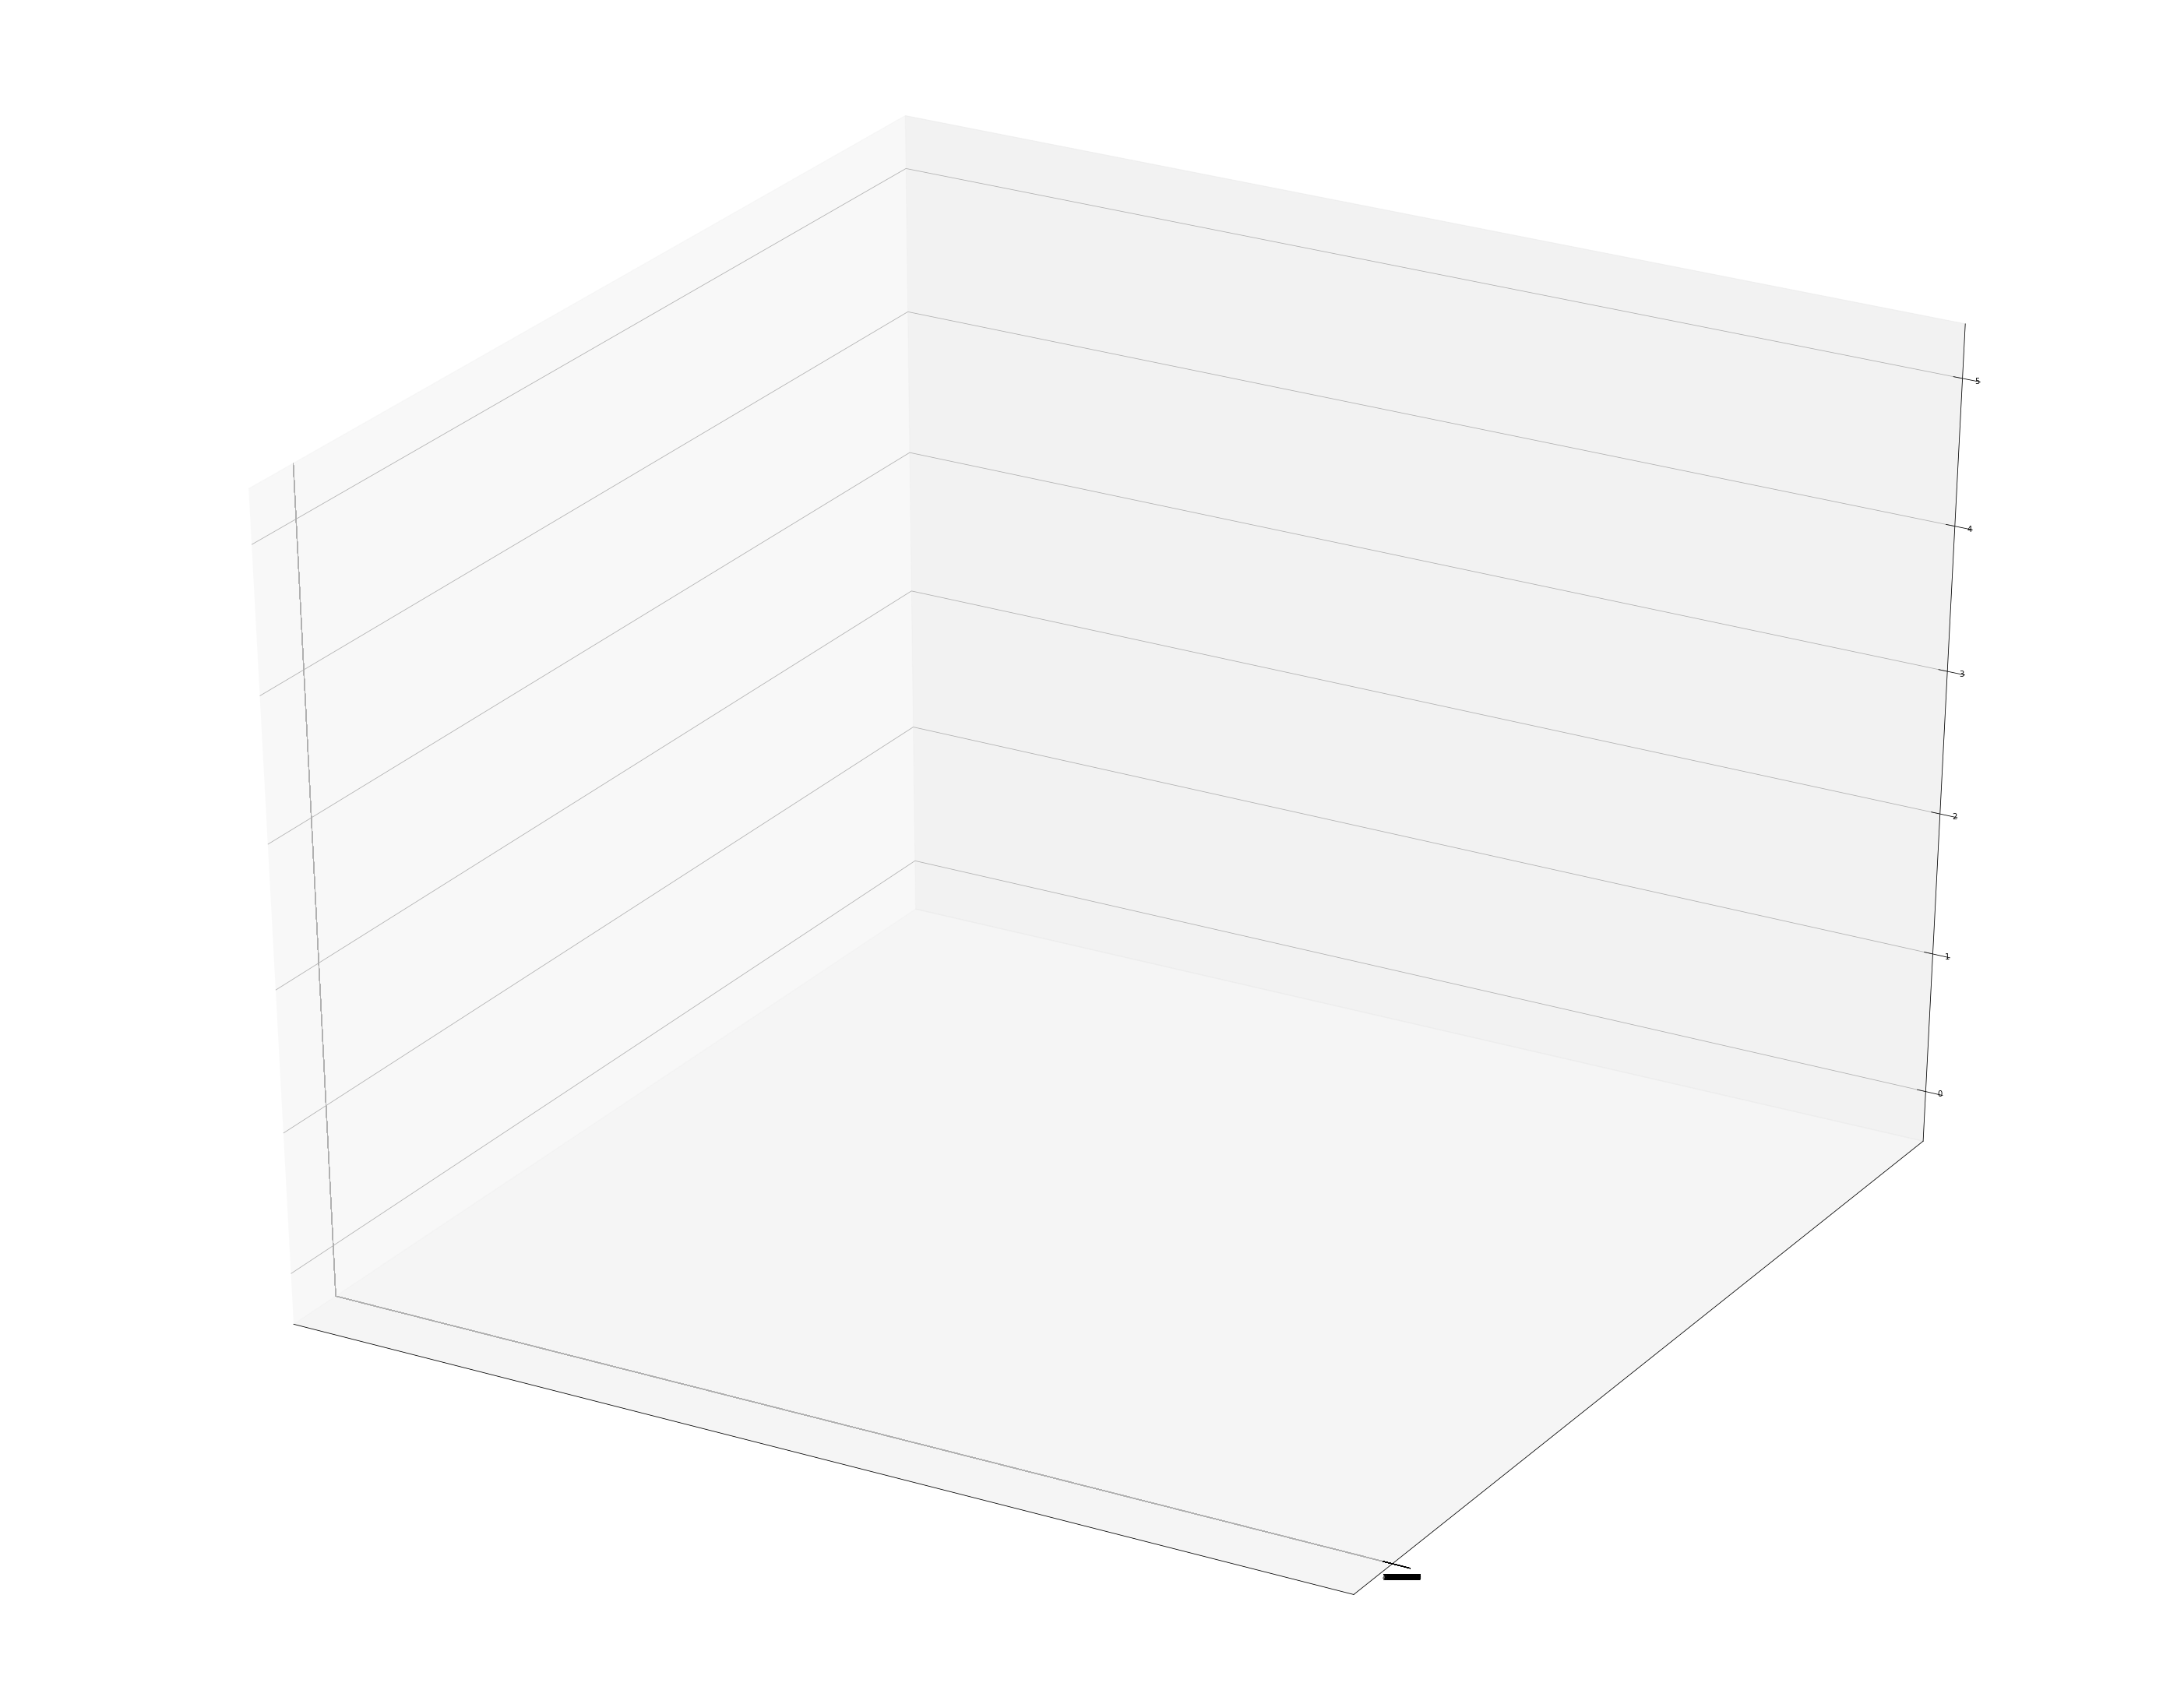

In [ ]:
#km = KMeans(n_clusters=5)
#clusters = km.fit_predict(df.iloc[:,1:])
#df["label"] = clusters

 
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_final.Age[df_final.cluster == 0], df_final["NilaiBelanjaSetahun"][df_final.cluster == 0], df_model["Job"][df_final.cluster == 0], c='blue', s=60)
ax.scatter(df_final.Age[df_final.cluster == 1], df_final["NilaiBelanjaSetahun"][df_final.cluster == 1], df_model["Job"][df_final.cluster == 0], c='red', s=60)
ax.scatter(df_final.Age[df_final.cluster == 2], df_final["NilaiBelanjaSetahun"][df_final.cluster == 2], df_model["Job"][df_final.cluster == 0], c='green', s=60)
ax.scatter(df_final.Age[df_final.cluster == 3], df_final["NilaiBelanjaSetahun"][df_final.cluster == 3], df_model["Job"][df_final.cluster == 0], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("NilaiBelanjaSetahun")
ax.set_zlabel('Job')
plt.show()

In [ ]:
#Menampilkan Cluster Tiap Pelanggan
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,4):
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

     No_cust                             Name  ... Dept_code cluster
1     100004                             AFEN  ...       PDG       0
5     100029           ASENG PERABOT P. KARAM  ...       PDG       0
13    100088                        ERI MEKAR  ...       PDG       0
16    100092                   LILI FURNITURE  ...       PDG       0
28    100165                          LEGIMAN  ...       PDG       0
49    100316                      YUS PERABOT  ...       PDG       0
51    100325                        ZULKAADRI  ...       PDG       0
56    100373                          TOLE AL  ...       PDG       0
87    100559                         SABRI AL  ...       PDG       0
93    100635                       AM PERABOT  ...       PDG       0
96    100659                         BENNY AL  ...       PDG       0
97    100663                    SINGGALANG AL  ...       PDG       0
105   100721          GALLERI ADVERTISING CV.  ...       PKU       0
115   10075

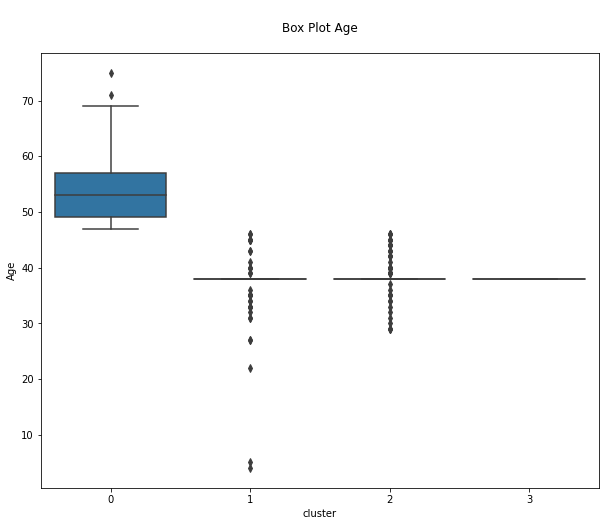

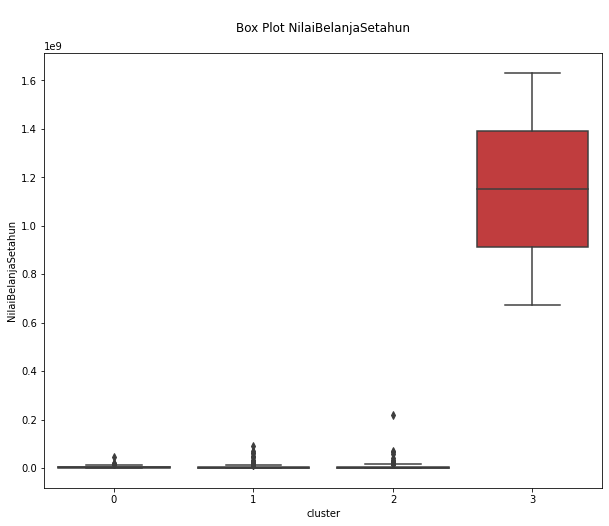

In [ ]:
#Visualisasi Hasil Clustering
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Age','NilaiBelanjaSetahun']

for i in kolom_numerik:
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

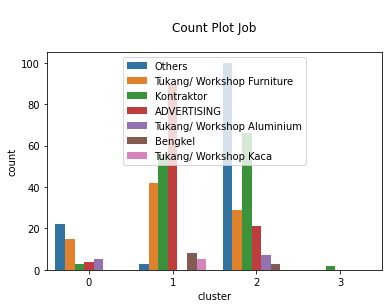

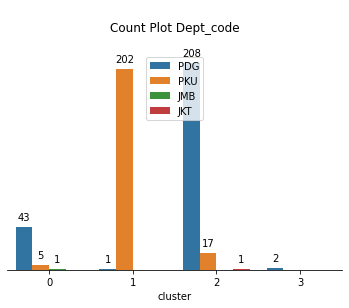

In [ ]:

import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Job','Dept_code']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
#Menamakan Cluster
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
0: 'Diamond Young Member',
1: 'Diamond Senior Member',
2: 'Silver Member',
3: 'Gold Young Member',
#4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No_cust              480 non-null    int64 
 1   Name                 480 non-null    object
 2   Age                  480 non-null    object
 3   Job                  480 non-null    object
 4   NilaiBelanjaSetahun  480 non-null    object
 5   Dept_code            480 non-null    object
 6   cluster              480 non-null    uint16
 7   segmen               480 non-null    object
dtypes: int64(1), object(6), uint16(1)
memory usage: 27.3+ KB
None
   No_cust                Name Age  ... Dept_code cluster                 segmen
0   100002           ACIAK UD.  38  ...       PDG       2          Silver Member
1   100004                AFEN  71  ...       PDG       0   Diamond Young Member
2   100011         ALFI TABING  38  ...       PDG       2          Silver Member
3   100012  ALF

In [ ]:
#OUTPUT CSV
df_final.to_csv('output_custseg_sti.csv', index=False)